ADCC (Abu Dhabi Combat Club) is a globally renowned submission grappling tournament that holds significant importance in the grappling world. It attracts elite grapplers from all over the globe to compete in its prestigious event. Winning an ADCC championship is considered a pinnacle achievement in grappling, considered by many as the Olympics of the sport, earning the respect and recognition of being among the best in the sport.


This notebook presents an exploratory data analysis (EDA) of the ADCC BJJ competition dataset. The dataset contains detailed information about individual matches, including winners, losers, methods of victory, and match details.

Introduction

The dataset contains various features from ADCC matches, including:

Match outcomes (winner, loser)
Victory methods (submission type, points)
Demographic data (weight class, sex)
Competition details (stage, year)
Our objective is to clean and explore the data, derive insights, and identify trends in submission types, weight classes, and other match statistics.

In [9]:
import pandas as pd
import seaborn as sns
from plotnine import ggplot, aes, geom_bar, labs, theme_minimal, theme, element_text, geom_line, coord_flip

df = pd.read_csv('./adcc_data.csv',sep=';')
submission_wins = df[df['win_type'] == 'Submission Win']

df.columns

Index(['match_id', 'winner_id', 'winner_name', 'loser_id', 'loser_name',
       'win_type', 'submission', 'winner_points', 'loser_points', 'adv_pen',
       'weight_class', 'sex', 'stage', 'year'],
      dtype='object')

Before performing any analysis, the dataset needs to be cleaned. Common cleaning steps include:

Handling missing values
Removing duplicates
Ensuring correct data types for each column
Checking for inconsistencies in categorical variables (e.g., weight classes)

In [10]:

# Clean the data
df['year'] = pd.to_datetime(df['year'], format='%Y')  # Convert 'year' column to datetime
df = df[df['win_type'] != 'DESQUALIFICATION']         # Remove rows with 'DESQUALIFICATION'

# Rename win_type values
win_type_renames = {
    'POINTS': 'Points Win',
    'SUBMISSION': 'Submission Win',
    'DECISION': 'Decision Win',
    'INJURY': 'Injury Win'
}

df['win_type'] = df['win_type'].replace(win_type_renames)

# Group the DataFrame and calculate the counts
counts = df.groupby(['win_type', df['year'].dt.year]).size().reset_index(name='count')



 Victory Method Analysis


/var/folders/cn/1py0zvm95nx9kp_1_zqwycrm0000gn/T/ipykernel_11293/1486989314.py:9: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


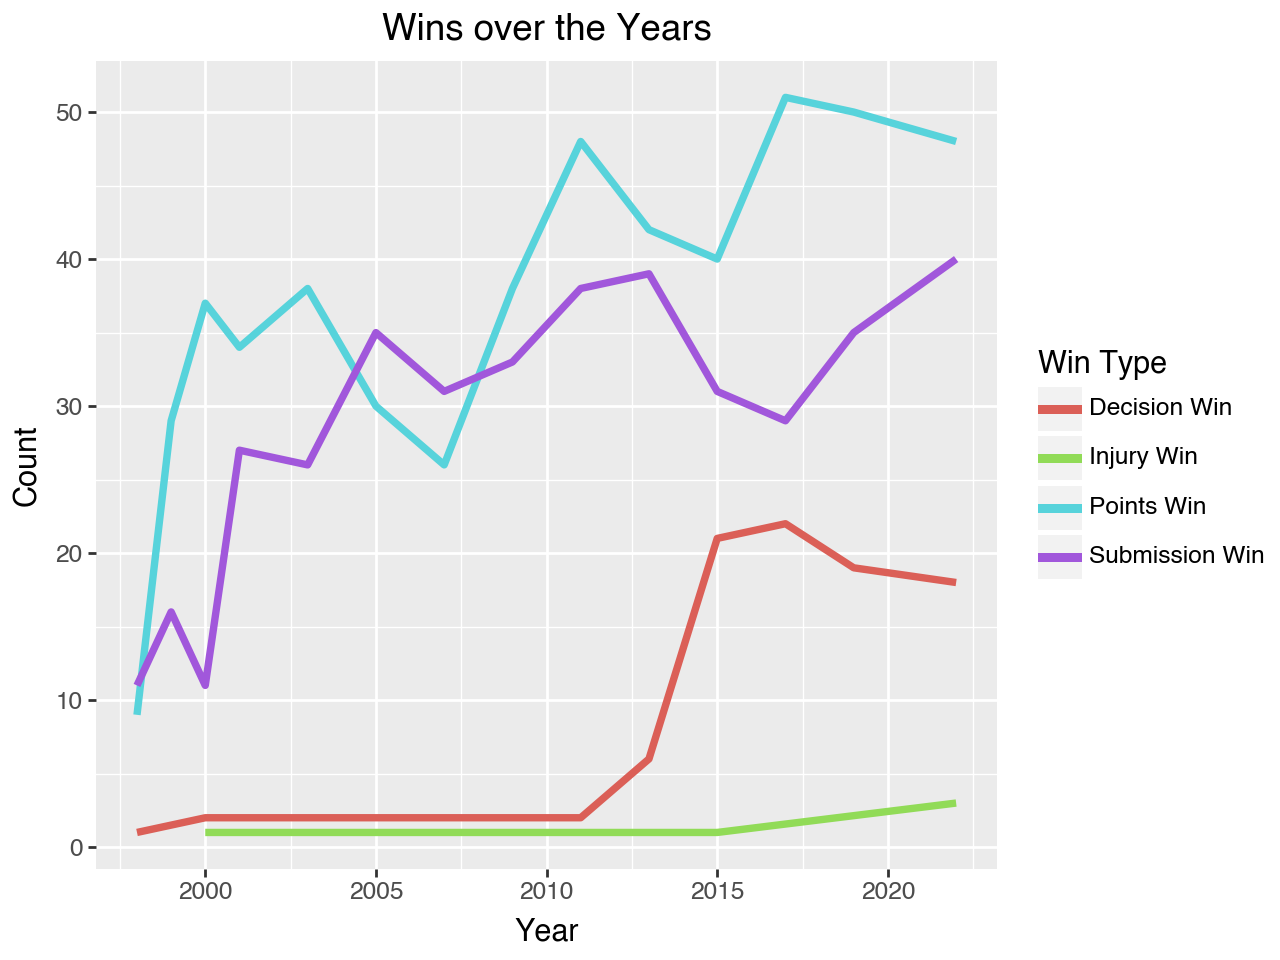

In [11]:

# Create the plot using ggplot (plotnine)
plot = (
    ggplot(counts, aes(x='year', y='count', color='win_type')) +
    geom_line(size=1.5) +
    labs(title="Wins over the Years", x="Year", y="Count", color="Win Type")
)

# Show the plot
print(plot)

 Submission Types and Trends

We will focus on analyzing the submission types and how often they occur in ADCC matches.



/var/folders/cn/1py0zvm95nx9kp_1_zqwycrm0000gn/T/ipykernel_11293/2486455312.py:22: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


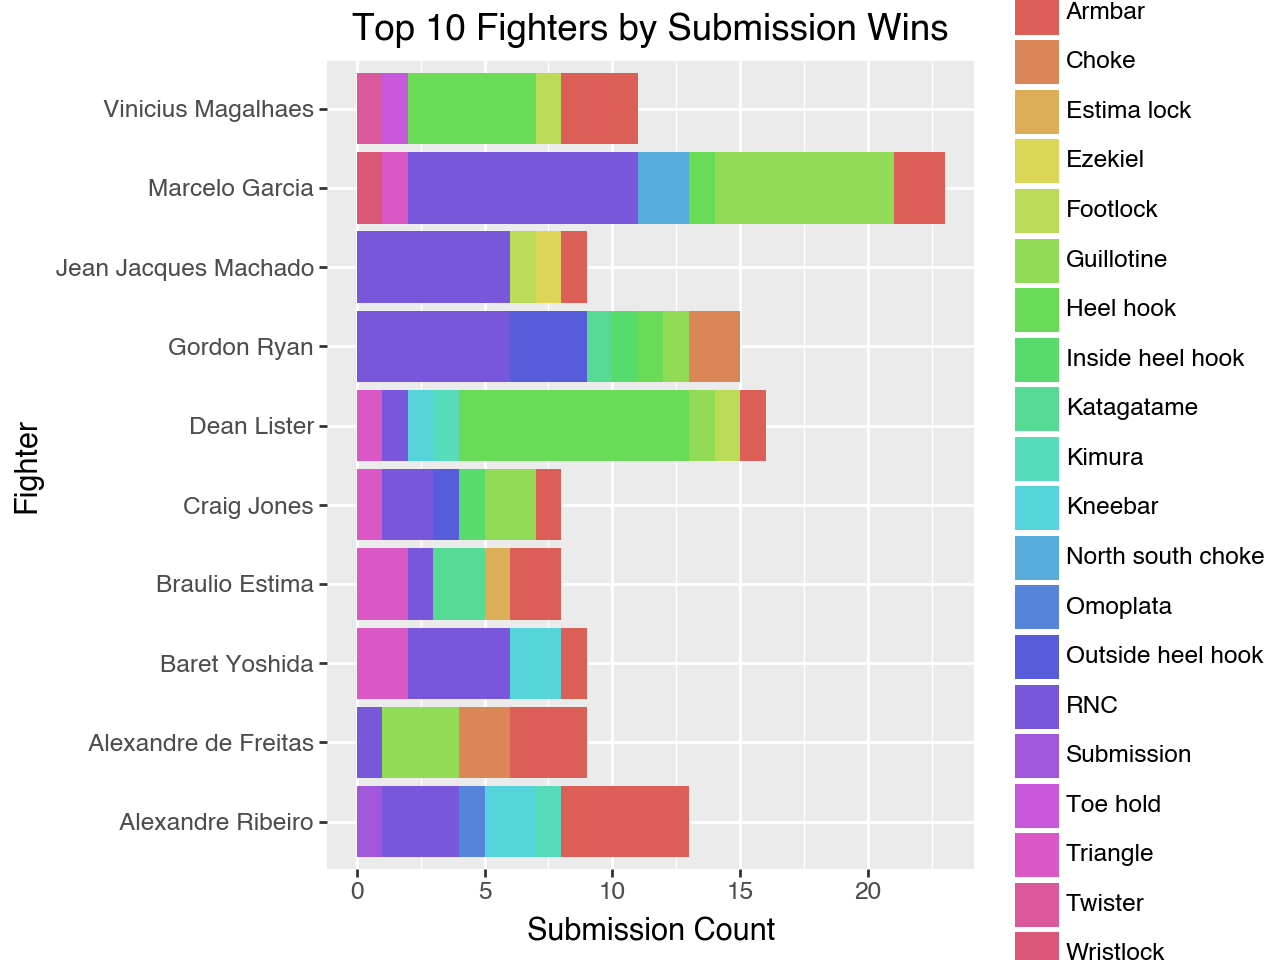

In [12]:
submission_wins = df[df['win_type'] == 'Submission Win']

# Group by winner_name and submission type, and count the occurrences
top_fighters = submission_wins.groupby(['winner_name', 'submission']).size().reset_index(name='count')

# Get the top 10 fighters by total submission wins
top_fighters_sum = top_fighters.groupby('winner_name')['count'].sum().nlargest(10).reset_index()

# Merge back with the top_fighters DataFrame to get their favorite submission
top_fighters = pd.merge(top_fighters, top_fighters_sum, on='winner_name')

# Plot the top 10 fighters with their most common submission technique
plot2 = (
    ggplot(top_fighters, aes(x='winner_name', y='count_x', fill='submission')) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(title="Top 10 Fighters by Submission Wins", x="Fighter", y="Submission Count", fill="Submission Type")
    
)

# Show  plot
print(plot2)


Marcelo Garcia's Wins via Submission

Marcelo Garcia, one of the most decorated competitors in ADCC history, is known for his incredible submission skills. In this section, we will focus on analyzing the submission victories achieved by Marcelo Garcia during his ADCC matches.

In [13]:
# Filter Marcelo Garcia's matches
marcelo_matches = df[df['winner_name'].str.contains('Marcelo Garcia', case=False, na=False)]
print(marcelo_matches["win_type"])


285        Points Win
286    Submission Win
287        Points Win
288    Submission Win
289    Submission Win
290    Submission Win
291        Points Win
301    Submission Win
404    Submission Win
451    Submission Win
457    Submission Win
701    Submission Win
702    Submission Win
703    Submission Win
704    Submission Win
705    Submission Win
708    Submission Win
709    Submission Win
710    Submission Win
711    Submission Win
712    Submission Win
713    Submission Win
714    Submission Win
715    Submission Win
872    Submission Win
934        Injury Win
946    Submission Win
Name: win_type, dtype: object


To better understand the distribution of Marcelo Garcia’s submission victories, we will visualize the submission types using a bar plot.

/var/folders/cn/1py0zvm95nx9kp_1_zqwycrm0000gn/T/ipykernel_11293/136617780.py:13: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


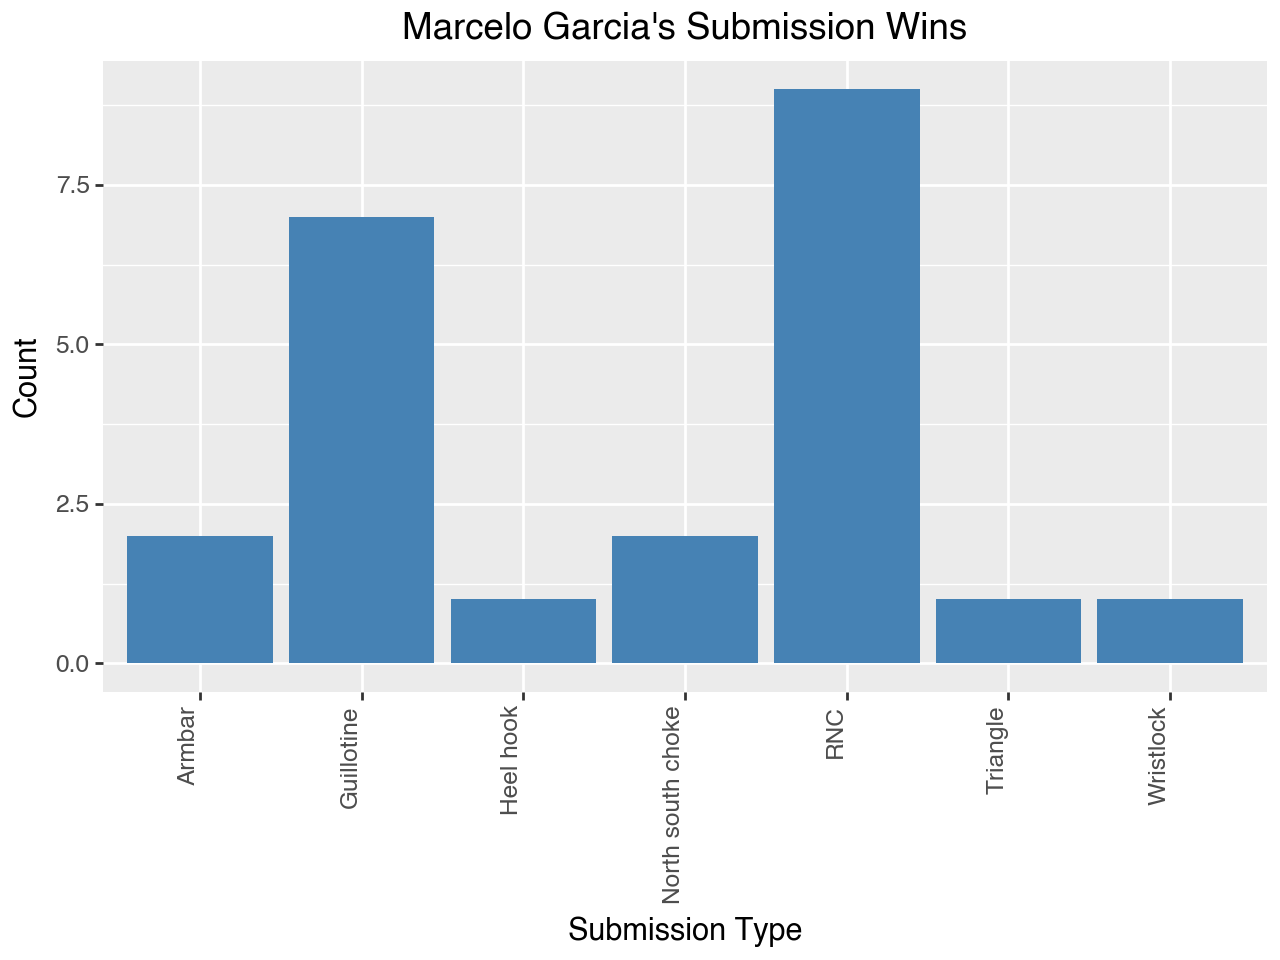

In [14]:
# Filter Marcelo's submission wins
marcelo_submissions = marcelo_matches[marcelo_matches['win_type'] == 'Submission Win']
# Count the types of submissions
submission_counts = marcelo_submissions['submission'].value_counts().reset_index()
submission_counts.columns = ['Submission Type', 'Count']
# Plot the data
plot_submissions = (
    ggplot(submission_counts, aes(x='Submission Type', y='Count')) +
    geom_bar(stat='identity', fill='steelblue') +
    labs(title="Marcelo Garcia's Submission Wins", x="Submission Type", y="Count") +
    theme(axis_text_x=element_text(rotation=90, hjust=1))
)
print(plot_submissions)


Evolution of Heel Hooks in ADCC

Heel hooks are one of the most dangerous and effective submissions in Brazilian Jiu-Jitsu and submission grappling, especially in ADCC competitions. In this section, we will explore the evolution of the heel hook submission over the years in ADCC matches. This analysis will help us understand the increasing or decreasing usage of this submission technique and its impact on match outcomes.

/var/folders/cn/1py0zvm95nx9kp_1_zqwycrm0000gn/T/ipykernel_11293/1007783318.py:14: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


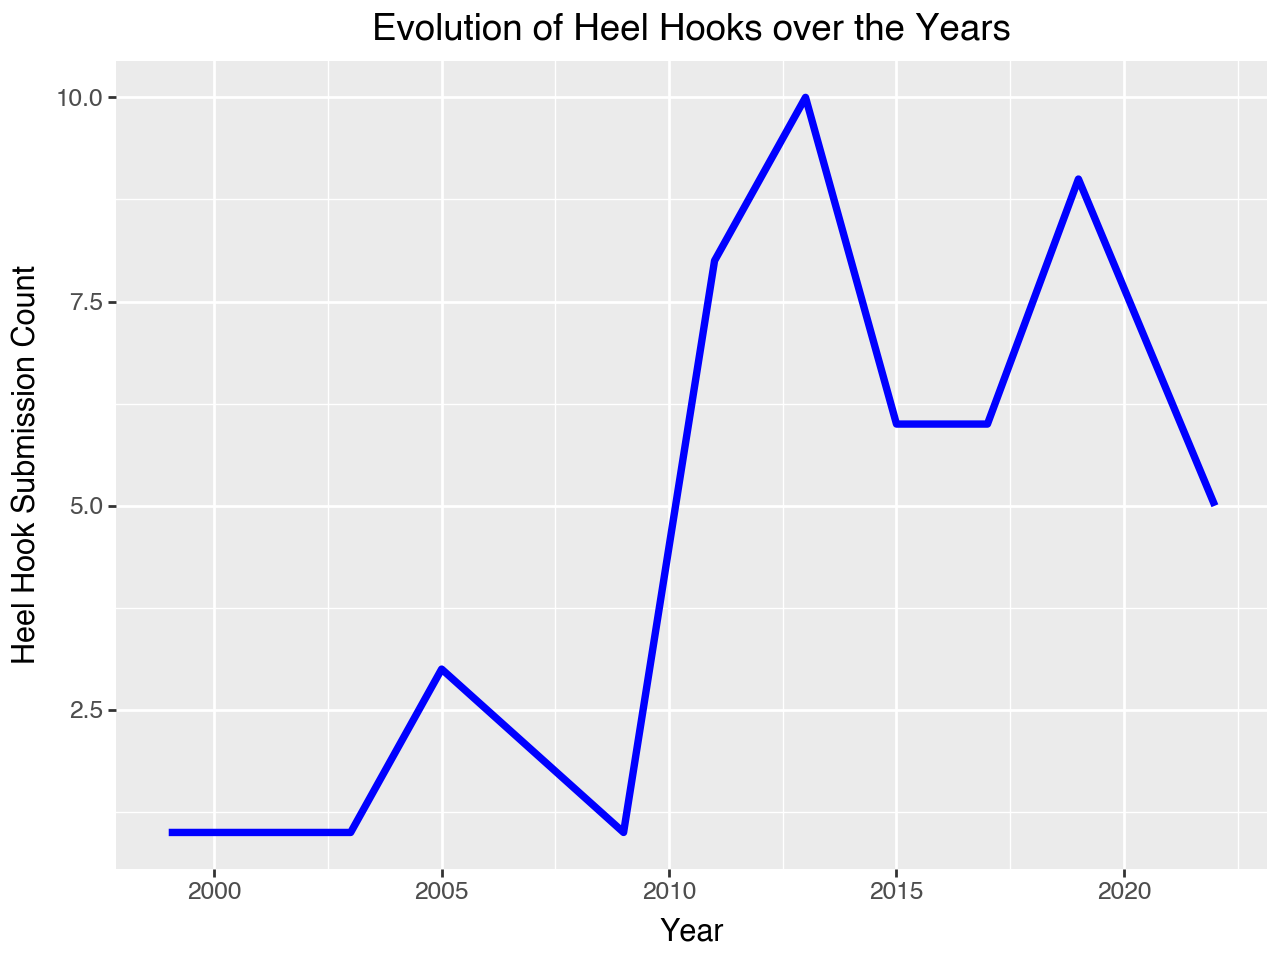

In [15]:
# Filter for heel hook submissions
heel_hooks = df[df['submission'].str.contains('heel hook', case=False, na=False)]

# Group by year and calculate the count of heel hook submissions each year
heel_hooks_evolution = heel_hooks.groupby(heel_hooks['year'].dt.year).size().reset_index(name='count')

# Plot the evolution of heel hooks over the years
plot_heel_hooks = (
    ggplot(heel_hooks_evolution, aes(x='year', y='count')) +
    geom_line(size=1.5, color='blue') +
    labs(title="Evolution of Heel Hooks over the Years", x="Year", y="Heel Hook Submission Count"))

# Show the plot
print(plot_heel_hooks)

Increase/Decrease in Heel Hook Usage: By analyzing the trend line, we can observe whether heel hooks have become more or less common over the years.


Correlation with Rule Changes: Changes in heel hook frequency may correlate with adjustments in ADCC rules, competitor skill levels, or the increasing focus on leg-lock techniques in modern BJJ.


Effectiveness of Heel Hooks: Examining the stages of competition where heel hooks are most commonly used (e.g., finals, semi-finals) may reveal how successful competitors are in applying this submission at the highest levels.